Konsta Nyman <br>
523834 <br>
January, 29, 2024  <br>

# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2024

### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b> <br>

<b> Instructions: </b> 

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score (using sklearn.preprocessing.StandardScaler is advised).
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Explain your code by adding detailed comments. 
    - Only provide code that is relevant to the exercise.
    - Please submit your solution as a Jupyter Notebook (.ipynb) and as a PDF file. Ensure to include your full name in the filename.     
    - Submit to moodle your solution on ** Wednesday 7 of February ** at the latest.
  
<b>Please follow the instructions and note that you are expected to submit your individual solution.<br>
Identical or overly similar submissions will result in the exercise being marked as failed.
</b>

## Import libraries

In [1]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeaveOneGroupOut


## Read and visualize the dataset

In [2]:
# In this cell read the file Water_data.csv
df_water_data = pd.read_csv('water_data.csv')

# Print the dataset dimesions (i.e. number of rows and columns)
print(f"The dimensions of the dataset are {df_water_data.shape}\n")

# Print the first 5 rows of the dataset
print(f"The first 5 rows of the dataset:\n\n{df_water_data.head()}")

The dimensions of the dataset are (268, 6)

The first 5 rows of the dataset:

    Mod1  Mod2    Mod3  c_total   Cd    Pb
0   9945   119   72335        0  0.0   0.0
1   9596   119  110542        0  0.0   0.0
2  10812   120   98594        0  0.0   0.0
3  10786   117   82977        0  0.0   0.0
4  10566   108  136416       14  0.0  14.0


## Standardization of the dataset

In [3]:
# In this cell, standardize the dataset features by removing the mean and scaling to unit variance. 
# In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3)

# create varaibles of input and output data column names
input_columns = ['Mod1', 'Mod2', 'Mod3']
output_columns = ['c_total', 'Cd', 'Pb']

scaler = StandardScaler() #create a scaler
df_water_data[input_columns] = scaler.fit_transform(df_water_data[input_columns]) #fit and transform the selected columns

# Print the 5 first samples (i.e. rows) of the scaled dataset
df_water_data.head()

,Mod1,Mod2,Mod3,c_total,Cd,Pb
0,-0.972283,-0.670482,-0.358179,0,0.0,0.0
1,-0.975878,-0.670482,0.259488,0,0.0,0.0
2,-0.963351,-0.670394,0.066333,0,0.0,0.0
3,-0.963619,-0.670657,-0.186137,0,0.0,0.0
4,-0.965885,-0.671447,0.677776,14,0.0,14.0


## C-index code 

In [4]:
# In this cell, implement the C-index function. You may use the implementation from the first exercise.
def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels"""
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

In [5]:
# Test the cindex function with following values
true_labels = np.array([-1, 1, 1, -1, 1])
predictions = np.array([0.60, 0.80, 0.75, 0.75, 0.70])
cindx = cindex(true_labels, predictions)
print(cindx) #For this example, a correct C-index implementation will result in 0.75

0.75


## Leave-One-Out cross-validation
In the following cell, write and execute your code for Leave-One-Out cross-validation using K-Nearest Neighbor Regression with k values of 1, 3, 5, and 7.<br>
Print the corresponding Leave-One-Out C-index for c_total, Cd and Pb for each k value.

In [10]:
# create leave-one-out cross-validator
loo = LeaveOneOut()

# create list to store values
loo_c_index_list = []

# loop different k-values

for k in [1,3,5,7]:

    # create k-NN model with k neighbors
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # initialize row temp variable
    row = []
    # loop c_total, Cd, and Pb
    for i in output_columns:

        # initialize list to store predictions
        y_predictions = []

        # create variables X and y to simplify cross validation
        X = df_water_data[input_columns]
        y = df_water_data[i]

        # perform cross-validation
        for train_index, test_index in loo.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # fit k-NN model
            knn_model.fit(X_train, y_train)

            # make predictions
            preds = knn_model.predict(X_test)
            y_predictions.append(preds) #append predicted value to list

        # evaluate predictions using cindex evaluator
        loo_c_index = cindex(y, y_predictions)

        # add c-index to row
        row.append(loo_c_index)
    
    # add row to c-index list
    loo_c_index_list.append(row)

# create a dataframe from the list
loo_c_index_df = pd.DataFrame(loo_c_index_list, index=['1', '3', '5', '7'], columns=['c_total', 'Cd', 'Pb'])
loo_c_index_df

,c_total,Cd,Pb
1,0.908098,0.913592,0.879590
3,0.920363,0.912488,0.884710
5,0.896185,0.866349,0.860935
7,0.883905,0.831597,0.841043


## Leave-Replicas-Out cross-validation

In the following cell, write and execute your code for Leave-Replicas-Out cross-validation using K-Nearest Neighbor Regression with k values of 1, 3, 5, and 7.<br>
Print the corresponding Leave-Replicas-Out C-index for c_total, Cd and Pb for each k value.

In [11]:
# create leave-replicas-out cross-validator
logo = LeaveOneGroupOut()
groups = np.repeat(range(0, int(len(X)/4)), 4)

# create list to store values
lro_c_index_list = []

# loop different k-values

for k in [1,3,5,7]:

    # create k-NN model with k neighbors
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # create temp variable row
    row = []
    
    # loop c_total, Cd, and Pb
    for i in output_columns:

        # initialize list to store predictions
        y_predictions = []

        # create variables X and y to simplify cross validation
        X = df_water_data[input_columns]
        y = df_water_data[i]

        # perform cross-validation
        for train_index, test_index in logo.split(X, y, groups):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # fit k-NN model
            knn_model.fit(X_train, y_train)

            # make predictions
            preds = knn_model.predict(X_test)
            y_predictions.extend(preds) #add all new predictions to the list

        # evaluate predictions using cindex evaluator
        logo_c_index = cindex(y, y_predictions)

        # add c-index to row
        row.append(logo_c_index)
    
    # add row to c-index list
    lro_c_index_list.append(row)

# create a dataframe from the list
lro_c_index_df = pd.DataFrame(lro_c_index_list, index=['1', '3', '5', '7'], columns=['c_total', 'Cd', 'Pb'])
lro_c_index_df

,c_total,Cd,Pb
1,0.823848,0.752545,0.736008
3,0.823115,0.753546,0.762859
5,0.816074,0.733330,0.748131
7,0.819694,0.742452,0.749941


## Plot Leave-One-Out and Leave-Replicas-Out Results

Note: You may plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

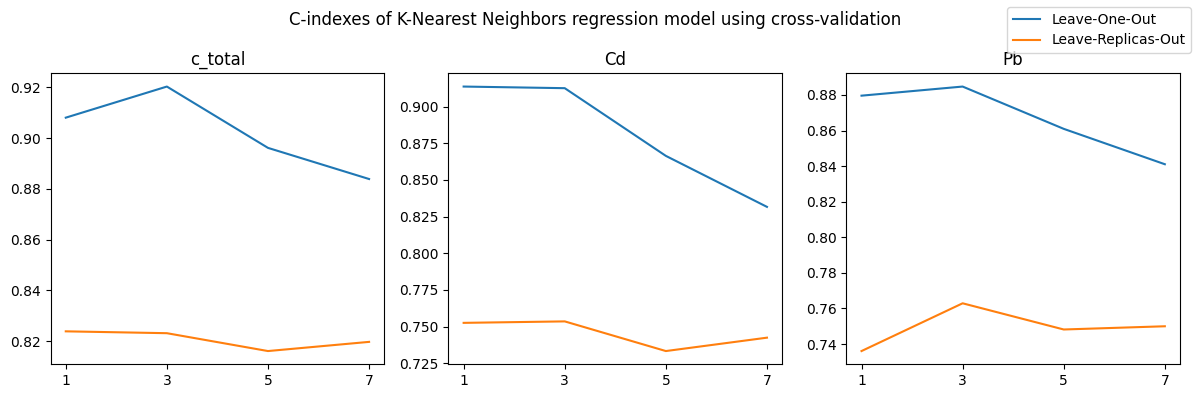

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    axes[i].plot(loo_c_index_df.iloc[:,i], label='Leave-One-Out')
    axes[i].plot(lro_c_index_df.iloc[:,i], label='Leave-Replicas-Out')
    axes[i].set_title(output_columns[i])

fig.suptitle("C-indexes of K-Nearest Neighbors regression model using cross-validation")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()

## Interpretation of results
#### Answer the following questions based on the results obtained
- Which cross-validation method had more optimistic results? 
- Explain the reason for the optimistic results produced by the cross-validation method.
- Which cross-validation method generalized better on unseen data? Why?

Leave-One-Out cross-validation has significantly more optimistic results.

Leave-one-out cross-validation produces optimistic results because of the non-independent replicas in the data. Leave-one-out cross-validation uses only one instance as a test set at the time, so the training set contains three replicas of the test set instance which skews the results in the optimistic direction. The training set can 'see' three very similar data points as the test set so it can predict the value very well. This is also why we can see that when leave-one-out method uses more than three neighbours, the results deteriorate.

However, the results are optimistically biased because of the replicas. This is why leave-replicas-out generalizes better on unseen data. Leave-replicas-out takes all the replicas in the test set and cannot see any replicas of the test set in the training set and therefore generalizes better on unseen data.